=== Evaluation Metrics ===
Accuracy : 0.50
Precision: 0.45
Recall   : 0.56


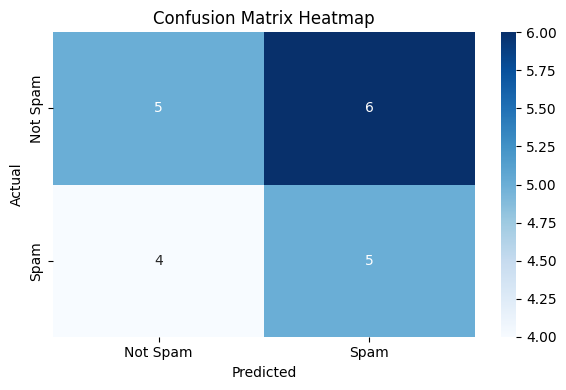

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report
)

# 🔹 Load your dataset
# 🔹 Load dataset
df = pd.read_csv("spam_emails.csv")

# 🔹 Convert string labels to numeric
df["is_spam"] = df["is_spam"].map({"no": 0, "yes": 1})

# 🔹 Feature columns and target
X = df[["num_links", "num_attachments", "sender_reputation"]]
y = df["is_spam"]

# 🔹 Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🔹 Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🔹 Predict
y_pred = model.predict(X_test)

# 🔹 Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix
)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")

# 🔹 Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Spam", "Spam"],
            yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
